In [1]:
# import sys
# !{sys.executable} -m pip install matplotlib_venn

In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2

import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

In [7]:
db = 'ec'
### Loop the data lines
with open("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_"+db+".tsv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_'+db+'.tsv', delimiter="\t", names=column_names)
df.dropna(axis=1, how='all', inplace=True)
df.columns=['protein', 'id', 'description']
annot_ec = df



db = 'kegg'
### Loop the data lines
with open("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_"+db+".tsv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_'+db+'.tsv', delimiter="\t", names=column_names)
df.dropna(axis=1, how='all', inplace=True)
df.columns=['protein', 'id', 'description']
annot_kegg = df



db = 'pfam'
### Loop the data lines
with open("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_"+db+".tsv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_'+db+'.tsv', delimiter="\t", names=column_names)
df.dropna(axis=1, how='all', inplace=True)
df.columns=['protein', 'id', 'description']
annot_pfam = df



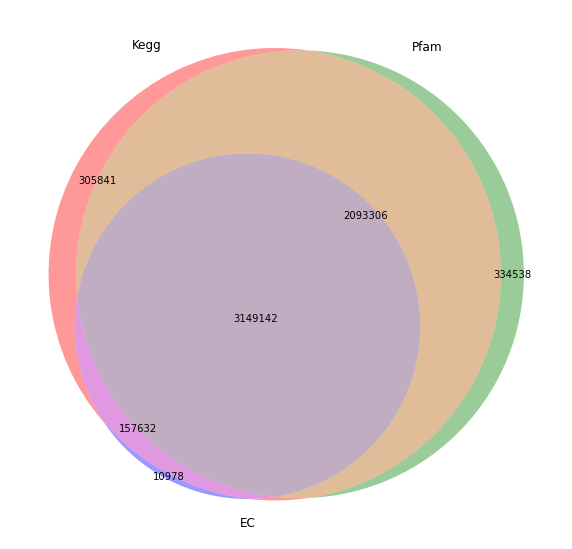

In [13]:
plt.figure(figsize=(10,10))
kegg = set(annot_kegg['protein'])
pfam = set(annot_pfam['protein'])
ec = set(annot_ec['protein'])

venn3([kegg, pfam, ec], ('Kegg', 'Pfam', 'EC'))
plt.show()

## unique annotations

In [6]:
unique_annot_kegg = pd.read_csv(analysis+'/intermediate_results/kegg_unique_gut_functions_annotation.csv',
           sep='\t')
unique_annot_pfam = pd.read_csv(analysis+'/intermediate_results/pfam_unique_gut_functions_annotation.csv',
           sep='\t')
unique_annot_ec = pd.read_csv(analysis+'/intermediate_results/ec_unique_gut_functions_annotation.csv',
           sep='\t')


In [7]:
unique_annot_pfam.shape

(781, 6)

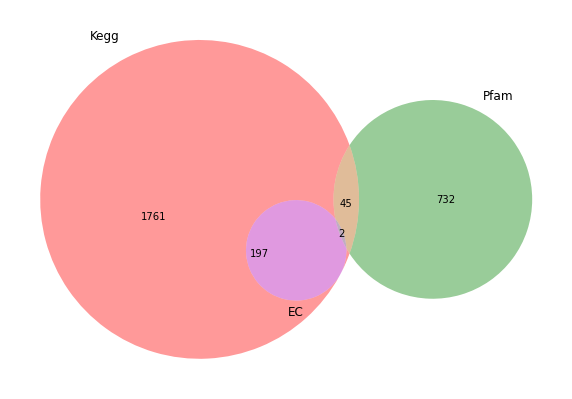

In [8]:
plt.figure(figsize=(10,10))
kegg = set(unique_annot_kegg['protein'])
pfam = set(unique_annot_pfam['protein'])
ec = set(unique_annot_ec['protein'])

venn3([kegg, pfam, ec], ('Kegg', 'Pfam', 'EC'))
plt.show()

In [9]:
unique_annot_ec.shape

(199, 6)

In [10]:
unique_annot_ec.merge(unique_annot_pfam, on='protein')[['protein', 'id_x', 'description_x','id_y', 'description_y']]

protein      id_x                     description_x  \
0  GUT_GENOME024240.fasta_2351  2.7.1.58  2-dehydro-3-deoxygalactonokinase   
1   GUT_GENOME213656.fasta_698  3.2.1.50     alpha-N-acetylglucosaminidase   

      id_y                                      description_y  
0  PF05035                    D-galactonate catabolic process  
1  PF05089  Alpha-N-acetylglucosaminidase (NAGLU) tim-barr...

## Interstection

In [11]:
from functools import reduce
# d = [unique_annot_ec.protein, unique_annot_kegg.protein, unique_annot_pfam.protein]
d = [unique_annot_kegg.protein, unique_annot_ec.protein]
overlap = list(reduce(set.intersection, [set(item) for item in d ]))

In [12]:
tmp = pd.DataFrame(overlap, columns=['protein']).merge(unique_annot_kegg, on='protein')
tmp.groupby(['id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.sort_values('protein', ascending=False)\
.head(50)

id                                        description  protein
3   K00214                               biliverdin reductase       54
37  K17465          D-glucosaminate PTS system EIIB component       20
43  K19180       dTDP-6-deoxy-L-talose 4-dehydrogenase (NAD+)        9
53  K22208                              (-)-camphene synthase        9
27  K13546                    2-deoxy-scyllo-inosose synthase        8
17  K03278  UDP-D-galactose:(glucosyl)LPS alpha-1,3-D-gala...        7
15  K01232                   maltose-6'-phosphate glucosidase        5
54  K22353                 alkene monooxygenase alpha subunit        4
35  K16873         5-(hydroxymethyl)furfural/furfural oxidase        3
7   K00725  (N-Acetylneuraminyl)-galactosylglucosylceramid...        3
1   K00105                     alpha-glycerophosphate oxidase        3
56  K22427                        phenylalanine decarboxylase        3
30  K15393                  beta-cyclopiazonate dehydrogenase        3
26  K13059                        N-acetylhexosamine 1-kinase        3
63  K23968                            8-oxogeranial reductase        2
9   K00785  N-acetyllactosaminide alpha-2,3-sialyltransferase        2
44  K20262             dihydrophenazinedicarboxylate synthase        2
45  K20438               validoxylamine A glucosyltransferase        2
46  K20678                           dTDP-fucopyranose mutase        2
36  K17464          D-glucosaminate PTS system EIIA component        2
32  K15809                          cis-muuroladiene synthase        2
31  K15744                            zeta-carotene isomerase        2
4   K00223                    Delta24(24(1))-sterol reductase        2
50  K21372                  chalcone 4'-O-glucosyltransferase        2
14  K01216                                        licheninase        2
6   K00597                      methionine synthase reductase        2
51  K21707                             acyl-CoA 15-desaturase        1
47  K20991    all-trans-retinyl ester 13-cis isomerohydrolase        1
62  K23524                ginsenoside 6-O-glucosyltransferase        1
61  K22945                                   nezukol synthase        1
60  K22749                          glycine N-acyltransferase        1
65  K24290  [1-hydroxy-2-(trimethylamino)ethyl]phosphonate...        1
59  K22692  1H-pyrrole-2-carbonyl-[peptidyl-carrier protei...        1
58  K22638                             carnosic acid synthase        1
52  K21948                        3-dehydrotetronate 4-kinase        1
57  K22635         ferruginol monooxygenase / sugiol synthase        1
55  K22419                Delta4-3-oxosteroid 5beta-reductase        1
48  K21231  3,8-divinyl protochlorophyllide a 8-vinyl-redu...        1
49  K21368  O86-antigen biosynthesis alpha-1,3-galactosylt...        1
42  K18610                                4-pyridoxolactonase        1
64  K24277                                 capsaicin synthase        1
0   K00095                             mannitol dehydrogenase        1
33  K16004  narbonolide/10-deoxymethynolide desosaminyltra...        1
41  K18250                      5-nitrosalicylate dioxygenase        1
40  K18221  tetracycline 11a-monooxygenase, tetracycline r...        1
2   K00209  enoyl-[acyl-carrier protein] reductase / trans...        1
5   K00509              prostaglandin-endoperoxide synthase 1        1
8   K00742  N-acetyllactosaminide beta-1,6-N-acetylglucosa...        1
10  K00883                   2-dehydro-3-deoxygalactonokinase        1
11  K00920        1-phosphatidylinositol-5-phosphate 4-kinase        1

In [13]:
tmp2 = unique_annot_kegg[~unique_annot_kegg.protein.isin(unique_annot_pfam.protein)]
tmp3 = tmp2[~tmp2.protein.isin(unique_annot_ec.protein)]

tmp3.groupby(['id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.sort_values('protein', ascending=False)\
.head(50)

id                                        description  protein
205  K14495                                 F-box protein GID2      433
145  K11234                      mating pheromone alpha-factor      158
131  K10436       microtubule-associated protein, RP/EB family       96
322  K23498                       peptide chain release factor       90
282  K20411                             proline-rich protein 5       89
175  K12706               novobiocin biosynthesis protein NovC       65
12   K02369    alpha-1,4-N-acetylglucosaminyltransferase EXTL2       42
297  K21577  glycine/sarcosine/betaine reductase complex co...       37
270  K19543               aminoglycoside 3'-phosphotransferase       29
56   K05439                                          prolactin       27
226  K16195  eukaryotic translation initiation factor 2-alp...       24
195  K13901                                         cystatin-D       17
110  K09469      2-aminoethylphosphonate-pyruvate transaminase       16
68   K06407                     stage V sporulation protein AE       16
261  K19082  two-component system, OmpR family, response re...       15
312  K22554                 acyl-coenzyme A thioesterase THEM5       11
240  K17319  putative aldouronate transport system permease...       10
308  K22406                                thymine dioxygenase        9
153  K11518        mitochondrial import receptor subunit TOM40        9
267  K19481                                 matrix Gla protein        8
14   K02734                      20S proteasome subunit beta 4        8
269  K19506  fructoselysine/glucoselysine PTS system EIIA c...        7
225  K16158       methane monooxygenase component A beta chain        7
216  K15198          transcription factor TFIIIB component B''        7
75   K06577                      Kell blood group glycoprotein        7
169  K12128                        pseudo-response regulator 9        7
5    K01086  fructose-1,6-bisphosphatase I / sedoheptulose-...        7
336  K24356                            collagen type XXV alpha        7
274  K19873                            fukutin-related protein        6
69   K06411                    dipicolinate synthase subunit B        6
211  K15114            mitochondrial ornithine carrier protein        6
168  K12091                 cag pathogenicity island protein 6        6
67   K06387                     stage II sporulation protein R        6
262  K19212                      beta-lactamase class D OXA-63        6
298  K21609                                    metallothionein        5
59   K05615  solute carrier family 1 (neutral amino acid tr...        5
197  K13959                              kelch-like protein 38        5
138  K10830  manganese/zinc transport system ATP-binding pr...        5
215  K15195                           AF4/FMR2 family member 3        5
119  K09974                            uncharacterized protein        5
158  K11642        chromodomain-helicase-DNA-binding protein 3        5
227  K16405              stigmatellin polyketide synthase StiA        5
299  K21691                resuscitation-promoting factor RpfE        5
182  K12985            (galactosyl)LPS 1,2-glucosyltransferase        4
146  K11247                                       endophilin-A        4
177  K12775                     monopolin complex subunit LRS4        4
200  K14244                                   amidotransferase        4
93   K08074                          ADP-dependent glucokinase        4
167  K12090                 cag pathogenicity island protein 5        4
123  K10171                              toll-like receptor 10        4